In [4]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Replace 'YOUR_API_KEY' with your actual Alpha Vantage API key
API_KEY = 'LL6T7E05ODLIGILE' #'JB01QMIO6Y6OVRTD'
BASE_URL = 'https://www.alphavantage.co/query'

ImportError: DLL load failed while importing _imaging: Das angegebene Modul wurde nicht gefunden.

In [33]:
def fetch_data(symbol, function, **params):
    params['function'] = function
    params['symbol'] = symbol
    params['apikey'] = API_KEY
    response = requests.get(BASE_URL, params=params)
    data = response.json()
    return data

In [34]:
def symbol_data_to_data_frame(data):
    df = pd.DataFrame(data).T
    df.index = pd.to_datetime(df.index)
    df['5. adjusted close'] = df['5. adjusted close'].astype(float)
    return df

In [163]:
def line_plot_symbol_df(df, titel, x, y):
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['5. adjusted close'], label=titel)

    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(titel)
    plt.legend()
    plt.grid(True)
    plt.show()

In [174]:
# List of sector symbols
sectors = [
    "XLC",  # Communication Services
    "XLY",  # Consumer Discretionary
    "XLP",  # Consumer Staples
    "XLE",  # Energy
    "XLF",  # Financials
    "XLV",  # Health Care
    "XLI",  # Industrials
    "XLB",  # Materials
    "XLRE", # Real Estate
    "XLK",  # Technology
    "XLU",  # Utilities
]
sector_names = {
    "XLC":  "Communication Services",
    "XLY":  "Consumer Discretionary",
    "XLP":  "Consumer Staples",
    "XLE":  "Energy",
    "XLF":  "Financials",
    "XLV":  "Health Care",
    "XLI":  "Industrials",
    "XLB":  "Materials",
    "XLRE": "Real Estate",
    "XLK":  "Technology",
    "XLU":  "Utilities",
}

In [216]:
def fetch_sector_data():
    # Dictionary to store sector data
    sector_data = {}

    #non-premium couter
    i = 0

    # Loop through sectors and make API requests
    for sector in sectors:
        data = fetch_data(sector, "TIME_SERIES_MONTHLY_ADJUSTED" )
        if len(data) > 1:
            sector_data[sector] = data['Monthly Adjusted Time Series']
        else:
            #exception for data fetch error
            raise Exception("data fetch error" + ' ' + data['Note'])
        #non-premium delay
        i += 1
        if i == 5:
            time.sleep(60)
            i=0
    return sector_data
sector_data = fetch_sector_data()
print(sector_data)

{'XLC': {'2023-09-01': {'1. open': '67.9500', '2. high': '67.9500', '3. low': '66.9228', '4. close': '67.1000', '5. adjusted close': '67.1000', '6. volume': '4034582', '7. dividend amount': '0.0000'}, '2023-08-31': {'1. open': '68.4200', '2. high': '68.9200', '3. low': '64.3150', '4. close': '67.7300', '5. adjusted close': '67.7300', '6. volume': '121411440', '7. dividend amount': '0.0000'}, '2023-07-31': {'1. open': '64.8700', '2. high': '69.2200', '3. low': '64.5250', '4. close': '68.7900', '5. adjusted close': '68.7900', '6. volume': '124113723', '7. dividend amount': '0.0000'}, '2023-06-30': {'1. open': '62.4200', '2. high': '65.6100', '3. low': '62.2800', '4. close': '65.0800', '5. adjusted close': '65.0800', '6. volume': '123494649', '7. dividend amount': '0.1049'}, '2023-05-31': {'1. open': '59.8100', '2. high': '62.7200', '3. low': '57.4300', '4. close': '62.2400', '5. adjusted close': '62.1387', '6. volume': '136868565', '7. dividend amount': '0.0000'}, '2023-04-28': {'1. open

In [201]:
def get_dates():
    dates = []
    for key , values in sector_data[sectors[10]].items():
        dates.append(key)
    return dates
dates = get_dates()
print(dates)

['2023-09-01', '2023-08-31', '2023-07-31', '2023-06-30', '2023-05-31', '2023-04-28', '2023-03-31', '2023-02-28', '2023-01-31', '2022-12-30', '2022-11-30', '2022-10-31', '2022-09-30', '2022-08-31', '2022-07-29', '2022-06-30', '2022-05-31', '2022-04-29', '2022-03-31', '2022-02-28', '2022-01-31', '2021-12-31', '2021-11-30', '2021-10-29', '2021-09-30', '2021-08-31', '2021-07-30', '2021-06-30', '2021-05-28', '2021-04-30', '2021-03-31', '2021-02-26', '2021-01-29', '2020-12-31', '2020-11-30', '2020-10-30', '2020-09-30', '2020-08-31', '2020-07-31', '2020-06-30', '2020-05-29', '2020-04-30', '2020-03-31', '2020-02-28', '2020-01-31', '2019-12-31', '2019-11-29', '2019-10-31', '2019-09-30', '2019-08-30', '2019-07-31', '2019-06-28', '2019-05-31', '2019-04-30', '2019-03-29', '2019-02-28', '2019-01-31', '2018-12-31', '2018-11-30', '2018-10-31', '2018-09-28', '2018-08-31', '2018-07-31', '2018-06-29', '2018-05-31', '2018-04-30', '2018-03-29', '2018-02-28', '2018-01-31', '2017-12-29', '2017-11-30', '2017

In [202]:
# Convert sector data to pandas DataFrames
def sector_to_data_frame():
    sector_dfs = {}
    for sector, data in sector_data.items():
        df = pd.DataFrame(data).T
        df.index = pd.to_datetime(df.index)
        df['5. adjusted close'] = df['5. adjusted close'].astype(float)
        sector_dfs[sector_names[sector] + " (" + sector + ")"] = df
    return sector_dfs

sector_dfs = sector_to_data_frame()
print(sector_dfs)

{'Communication Services (XLC)':             1. open  2. high   3. low 4. close  5. adjusted close  6. volume  \
2023-09-01  67.9500  67.9500  66.9228  67.1000            67.1000    4034582   
2023-08-31  68.4200  68.9200  64.3150  67.7300            67.7300  121411440   
2023-07-31  64.8700  69.2200  64.5250  68.7900            68.7900  124113723   
2023-06-30  62.4200  65.6100  62.2800  65.0800            65.0800  123494649   
2023-05-31  59.8100  62.7200  57.4300  62.2400            62.1387  136868565   
...             ...      ...      ...      ...                ...        ...   
2018-11-30  46.1900  46.7900  42.3800  45.0100            43.1670   53149541   
2018-10-31  49.1700  49.2200  43.0700  46.0400            44.1548  115192982   
2018-09-28  49.0500  49.5300  47.1700  49.0000            46.9936   44621850   
2018-08-31  48.5600  50.0600  47.9000  49.1800            47.0387    6752829   
2018-07-31  49.1100  52.1100  47.8690  48.4600            46.3500    8147373   

      

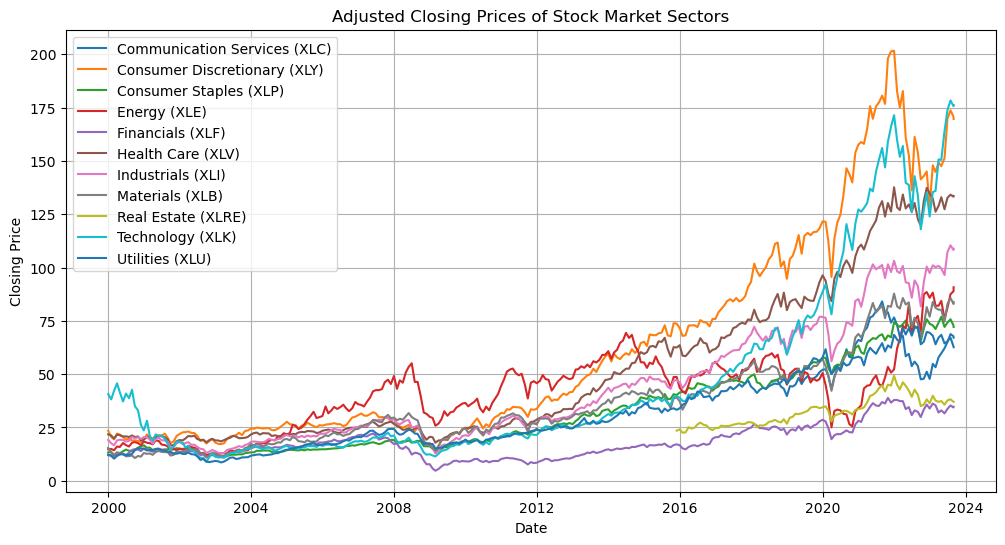

In [203]:
# Create a line plot for each sector's adjusted close values
def line_plot_sectors():
    plt.figure(figsize=(12, 6))
    for sector, df in sector_dfs.items():
        plt.plot(df.index, df['5. adjusted close'], label=sector)

    plt.xlabel("Date")
    plt.ylabel("Closing Price")
    plt.title("Adjusted Closing Prices of Stock Market Sectors")
    plt.legend()
    plt.grid(True)
    plt.show()

line_plot_sectors()

In [2]:
def heatmap_sectors():  
    # Combine the opening prices into a single DataFrame
    combined_df = pd.concat([df["5. adjusted close"] for df in sector_dfs.values()], axis=1)
    combined_df.columns = sectors_names

    # Calculate the correlation matrix
    correlation_matrix = combined_df.corr()

    # Create a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
    plt.title("Correlation Heatmap of Sector Closing Prices")
    plt.show()
    
heatmap_sectors()
#print(list(sector_dfs.keys()))

NameError: name 'pd' is not defined

In [206]:
def fetch_sp500_data():
    data = fetch_data("SPY", "TIME_SERIES_MONTHLY_ADJUSTED")
    if len(data) > 1:
            sp500_data = data['Monthly Adjusted Time Series']
    else:
        #exception for data fetch error
        raise Exception("data fetch error" + ' ' + data['Note'])
    return sp500_data

sp500_data = fetch_sp500_data()
print(sp500_data)

{'2023-09-01': {'1. open': '453.1700', '2. high': '453.6700', '3. low': '449.6800', '4. close': '451.1900', '5. adjusted close': '451.1900', '6. volume': '58944098', '7. dividend amount': '0.0000'}, '2023-08-31': {'1. open': '456.2700', '2. high': '457.2500', '3. low': '433.0100', '4. close': '450.3500', '5. adjusted close': '450.3500', '6. volume': '1755315375', '7. dividend amount': '0.0000'}, '2023-07-31': {'1. open': '442.9200', '2. high': '459.4400', '3. low': '437.0600', '4. close': '457.7900', '5. adjusted close': '457.7900', '6. volume': '1374774872', '7. dividend amount': '0.0000'}, '2023-06-30': {'1. open': '418.0900', '2. high': '444.3000', '3. low': '416.7900', '4. close': '443.2800', '5. adjusted close': '443.2800', '6. volume': '1749958214', '7. dividend amount': '1.6384'}, '2023-05-31': {'1. open': '415.4700', '2. high': '422.5800', '3. low': '403.7400', '4. close': '417.8500', '5. adjusted close': '416.2980', '6. volume': '1776447412', '7. dividend amount': '0.0000'}, '

In [207]:
sp500_df = symbol_data_to_data_frame(sp500_data)
print(sp500_df)

             1. open   2. high    3. low  4. close  5. adjusted close  \
2023-09-01  453.1700  453.6700  449.6800  451.1900           451.1900   
2023-08-31  456.2700  457.2500  433.0100  450.3500           450.3500   
2023-07-31  442.9200  459.4400  437.0600  457.7900           457.7900   
2023-06-30  418.0900  444.3000  416.7900  443.2800           443.2800   
2023-05-31  415.4700  422.5800  403.7400  417.8500           416.2980   
...              ...       ...       ...       ...                ...   
2000-04-28  150.1250  153.1093  133.5000  145.0937            94.5360   
2000-03-31  137.6250  155.7500  135.0312  150.3750            97.9770   
2000-02-29  139.7500  144.5625  132.7187  137.4375            89.3222   
2000-01-31  148.2500  148.2500  135.0000  139.5625            90.7032   
1999-12-31  139.3125  147.5625  139.0000  146.8750            95.4557   

             6. volume 7. dividend amount  
2023-09-01    58944098             0.0000  
2023-08-31  1755315375             

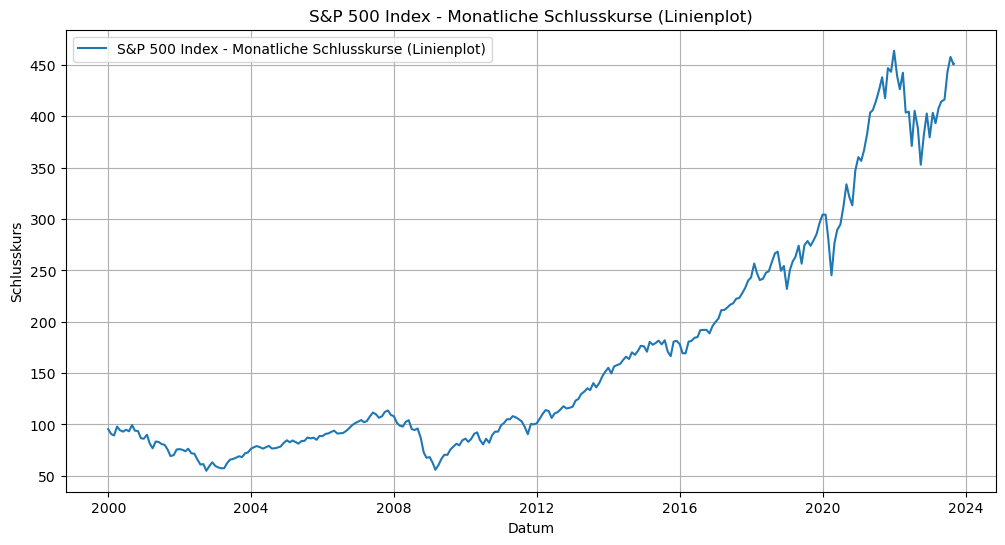

In [208]:
line_plot_symbol_df(sp500_df, "S&P 500 Index - Monatliche Schlusskurse (Linienplot)", "Datum", "Schlusskurs")

In [1]:
def market_percentage():
    dates = get_dates()
    sector_d = sector_data.copy() #fetch_sector_data()
    sp500_d = sp500_data.copy() #fetch_sp500_data()
    market_data = {}
    for symbol, data in sector_d.items():
        market_data[symbol] = {}
        for dateNr in range(0,len(data)):
            #print(symbol)
            #print(dates[dateNr])
            #print(data[dates[dateNr]])
            sector_value = float(data[dates[dateNr]]['5. adjusted close'])
            #print(sp500_d[date])
            sp500_value = float(sp500_d[dates[dateNr]]['5. adjusted close'])
            percentage = (sector_value / sp500_value) *100
            market_data[symbol][dates[dateNr]] = {'percentage' : percentage}
            #print(sector_d[symbol])
    sp500_t = {}
    for date in get_dates():
        sp500_t[date] = {'percentage' : 100}
    market_data["SPY"] = sp500_t
    return market_data

#print(sector_data)
market_data = market_percentage()
print(market_data)

NameError: name 'get_dates' is not defined

In [225]:
def market_correctnis():
    c = 0
    for date in get_dates():
        for sector in sectors:
            #print(market_data[sector][date])
            c += market_data[sector][date]['percentage']
        if c == 100:
            print(date)
            print("correct")
        else:
            print(date)
            print(c)
#market_correctnis()

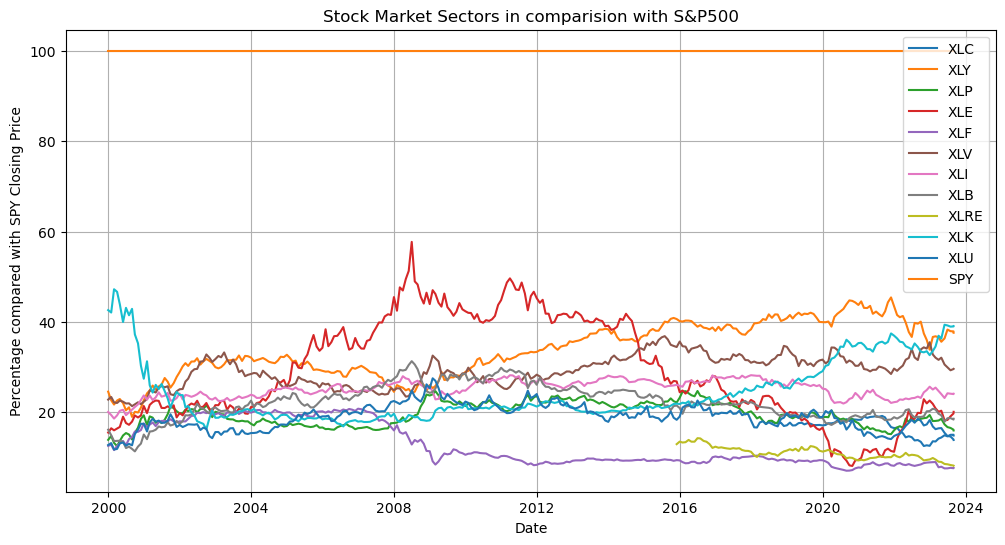

In [220]:
# Convert sector data to pandas DataFrames
def market_to_data_frame():
    market_dfs = {}
    for sector, data in market_data.items():
        df = pd.DataFrame(data).T
        df.index = pd.to_datetime(df.index)
        df['percentage'] = df['percentage'].astype(float)
        market_dfs[sector] = df#.head(15)  # Extract the first 15 rows
    return market_dfs

market_dfs = market_to_data_frame()

# Create a line plot for each sector's adjusted close values
def line_plot_market():
    plt.figure(figsize=(12, 6))
    for sector, df in market_dfs.items():
        plt.plot(df.index, df['percentage'], label=sector)

    plt.xlabel("Date")
    plt.ylabel("Percentage compared with SPY Closing Price")
    plt.title("Stock Market Sectors in comparision with S&P500")
    plt.legend()
    plt.grid(True)
    plt.show()

line_plot_market()

In [ ]:
event_date1 = pd.to_datetime('2008-01-01')
event_date2 = pd.to_datetime('2020-01-01')
shapes = []  # Add shapes for vertical line
shapes.append({
        'type': 'line',
        'x0': event_date1,
        'x1': event_date1,
        'y0': 0,
        'y1': 1,
        'xref': 'x',
        'yref': 'paper',
        'line': {'color': 'red', 'dash': 'dash'},
        'name': 'Finance Crises 2008'
    },{
        'type': 'line',
        'x0': event_date2,
        'x1': event_date2,
        'y0': 0,
        'y1': 1,
        'xref': 'x',
        'yref': 'paper',
        'line': {'color': 'organge', 'dash': 'dash'},
        'name': 'Corona Pandemie'
    })